In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Se está trabajando en la rama testgh by @SOG


In [48]:
file_path = r"2002to2018.csv"  #2002to2016.csv
df = pd.read_csv(file_path)
df.head()
# df = df.sort_values(by='duration.s', ascending=False).reset_index(drop=True)
# formatT = '%Y-%m-%d %H:%M:%S'

df['Datetime'] = pd.to_datetime(df['start.date'] +
                                ' ' + 
                                df['start.time'])
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
del df['flare']
del df['start.date']
del df['start.time']
del df['Datetime']

df.index

DatetimeIndex(['2002-02-12 21:29:56', '2002-02-12 21:44:08',
               '2002-02-13 00:53:24', '2002-02-13 04:22:52',
               '2002-02-13 07:03:52', '2002-02-13 07:07:48',
               '2002-02-13 07:20:56', '2002-02-13 08:53:20',
               '2002-02-13 10:02:56', '2002-02-13 12:29:32',
               ...
               '2018-02-08 17:00:04', '2018-02-08 18:42:44',
               '2018-02-08 19:52:56', '2018-02-09 14:53:32',
               '2018-02-09 15:45:28', '2018-02-09 16:41:28',
               '2018-02-09 18:15:56', '2018-02-10 13:04:36',
               '2018-02-26 15:49:56', '2018-03-03 04:04:08'],
              dtype='datetime64[ns]', name='Datetime', length=116143, freq=None)

In [50]:
## CALCULO DE ENERGIAS

Emax = []
Eprom = []
for i in df['energy.kev']:
    result = re.findall(r'[\d\.\d]+', i)
    Emax.append(float(result[1]))
    Eprom.append((float(result[0]) + float(result[1]))/2)

df['Emax.kev'] = Emax
df['Eprom.kev'] = Eprom
df.head()

,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5,Emax.kev,Eprom.kev
Datetime,,,,,,,,,,,,,,,,,
2002-02-12 21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,25.0,18.5
2002-02-12 21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,12.0,9.0
2002-02-13 00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,12.0,9.0
2002-02-13 04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN,25.0,18.5
2002-02-13 07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2,50.0,37.5


### Datos nulos y filtrado

In [51]:
# print(df.isnull().sum())

# nan_df = df[df.isna().any(axis=1)] # Almacena DataFrame en donde encuentra datos nulos NaN
# print(nan_df.head())

dffull = df.dropna(how='any')
dffull # df sin datos nulos, la flag de calidad es Q1 y Q2

### Filtro 

# filtro = dffull['flag.4'] == 'Q1'
# filtro2 = dffull['flag.5'] == 'Q1'
# dfFiltro = dffull[filtro]
# dfFiltro2 = dffull[filtro2]

# dfn = pd.concat([dfFiltro,dfFiltro2], axis=1)

# dfn = dfn.sort_index()

###

dfn = pd.concat([dffull[dffull['flag.4'] == 'Q1']
                ,dffull[dffull['flag.5'] == 'Q1']
                ]).sort_index()

dfn # Contiene los que poseen Q1 en flag.4 o flag.5

dffull


# Solo hay datos nulos en las flags

,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5,Emax.kev,Eprom.kev
Datetime,,,,,,,,,,,,,,,,,
2002-02-13 07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2,50.0,37.5
2002-02-13 10:02:56,10:04:42,10:04:44,108,26,10368.0,6-12,-235,390,455,9822,A1,P1,PE,Q2,SE,12.0,9.0
2002-02-14 10:06:44,10:09:42,10:10:36,232,60,39168.0,6-12,-135,310,338,0,A1,GE,P1,PE,Q2,12.0,9.0
2002-02-18 20:18:40,20:53:30,21:12:48,3248,304,2736546.0,12-25,-272,-202,339,9830,a0,A1,P1,PE,Q1,25.0,18.5
2002-02-18 22:30:12,22:30:18,22:45:16,904,18,68890.0,6-12,-269,-235,357,9830,a0,A1,P1,PE,Q1,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09 15:45:28,15:46:54,15:52:36,428,28,9088.0,6-12,0,0,0,2699,A0,DF,P1,PE,Q2,12.0,9.0
2018-02-09 16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2,12.0,9.0
2018-02-09 18:15:56,18:17:26,18:17:40,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2,12.0,9.0


## Histogramas
##### Se muestra la distribución de las erupciones en la superficie solar junto al histograma de la posición para cada ***(x,y)***

ok


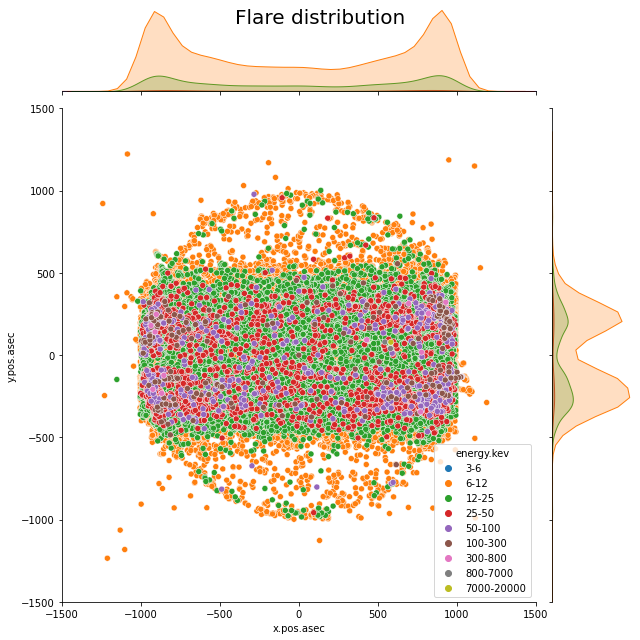

In [28]:
sns.jointplot(data=df.sort_values('Eprom.kev'), x='x.pos.asec', y='y.pos.asec', hue='energy.kev', kind='scatter', height=9, 
              xlim=(-1500, 1500), ylim=(-1500, 1500)).fig.suptitle('Flare distribution', fontsize=20)
plt.savefig('G1.png', dpi = 300)
print('ok')

#### Histograma de rango de energías

,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar,Emax.kev,Eprom.kev
count,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000
mean,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989,990.071550,15.798257,11.718171
std,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382,1351.853636,67.634900,44.361745
min,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000,6.000000,4.500000
25%,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000,0.000000,12.000000,9.000000
50%,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000,691.000000,12.000000,9.000000
75%,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000,1564.000000,12.000000,9.000000
max,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000,9999.000000,20000.000000,13500.000000


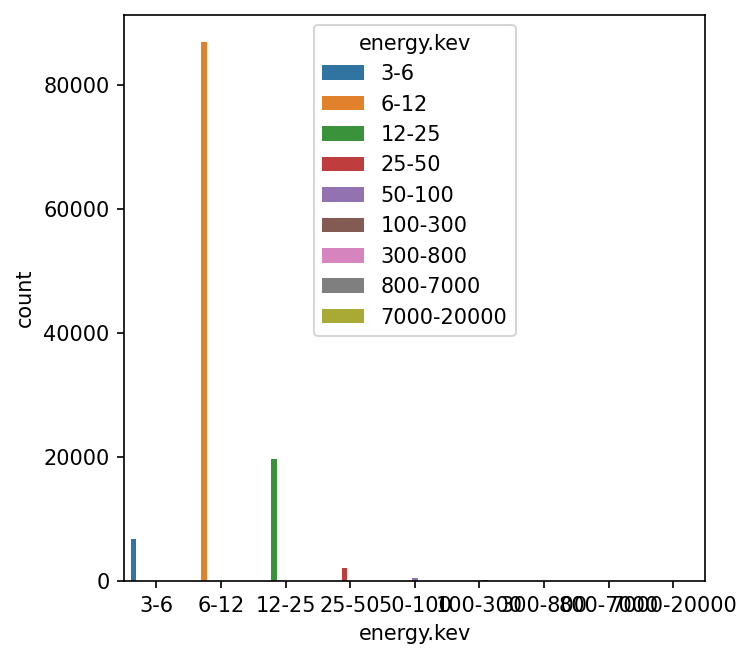

In [ ]:
#### To Do: Estadística con los datos

energy = df['energy.kev'] == '12-25' # Se filtra por rango de energias
dfenergy = df[energy]

datos = dfenergy['y.pos.asec'] 
datos.describe()


plt.figure(figsize=(5,5), dpi = 150)
sns.countplot(data=df.sort_values('Eprom.kev'), x="energy.kev", hue='energy.kev')
df.describe()

,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar,Emax.kev,Eprom.kev
count,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000
mean,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989,990.071550,15.798257,11.718171
std,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382,1351.853636,67.634900,44.361745
min,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000,6.000000,4.500000
25%,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000,0.000000,12.000000,9.000000
50%,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000,691.000000,12.000000,9.000000
75%,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000,1564.000000,12.000000,9.000000
max,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000,9999.000000,20000.000000,13500.000000


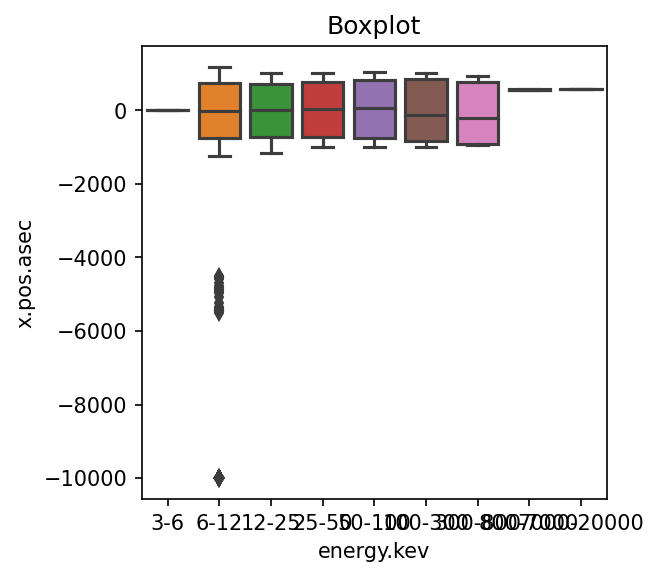

In [213]:
plt.figure(figsize=(4,4), dpi = 150)
sns.boxplot(data=df.sort_values('Eprom.kev'), x='energy.kev', y="x.pos.asec")
plt.title('Boxplot')
df.describe()

Text(0.5, 0, 'log(duration.s)')

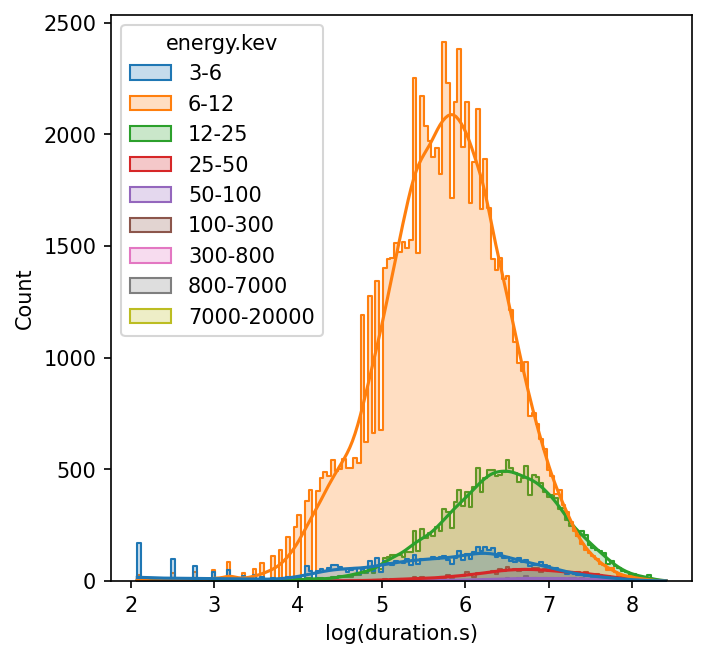

In [40]:
df = df.fillna('')
df['TotalFlags'] = df['flag.1'] + " " + df['flag.2'] + " " + df['flag.3'] + " " + df['flag.4'] + " " + df['flag.5']

# lista=[] # Lista que guarda el tamaño de la cadena para cada elemento de la columna }

# for i in df['TotalFlags']: # Barre cada elemento de la columna
#     i = re.sub("[^A-Z0-9 ]+", '', i)
#     lista.append(len(df.loc[i, 'words'])) #Hace el cálculo
    
# # prueba = re.sub("[^a-zA-Z0-9á-úÁ-Ú ]+", '', prueba)
# sns.distplot(df['duration.s'], kde_kws=dict(color='green', lw=3, shade=True),
#              hist_kws=dict(alpha=1, color= 'gold', edgecolor='red', lw=3))
# plt.xlabel('Duration in seconds', fontsize=16)
# plt.ylabel('Energy Density', fontsize=16)
df['duration.sl'] = np.log(df['duration.s'])

plt.figure(figsize=(5,5), dpi = 150)
sns.histplot(data=df.sort_values('Eprom.kev'), x='duration.sl', hue='energy.kev', element="step", kde=True)
plt.xlabel('log(duration.s)')
# plt.legend(df.value_counts('energy.kev', ascending=True).index, loc = 'upper left')

C:\Users\santi\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar,Emax.kev,Eprom.kev
count,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000
mean,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989,990.071550,15.798257,11.718171
std,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382,1351.853636,67.634900,44.361745
min,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000,6.000000,4.500000
25%,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000,0.000000,12.000000,9.000000
50%,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000,691.000000,12.000000,9.000000
75%,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000,1564.000000,12.000000,9.000000
max,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000,9999.000000,20000.000000,13500.000000


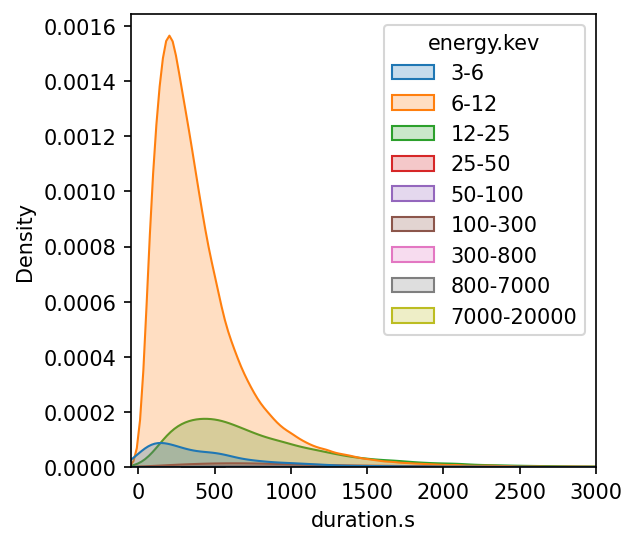

In [310]:
plt.figure(figsize=(4,4), dpi = 150)
sns.kdeplot(data=df.sort_values('Eprom.kev'), x='duration.s', hue='energy.kev', fill=True)
plt.xlim(-50,3000)
df.describe()

Text(0.5, 1.0, 'Boxplot')

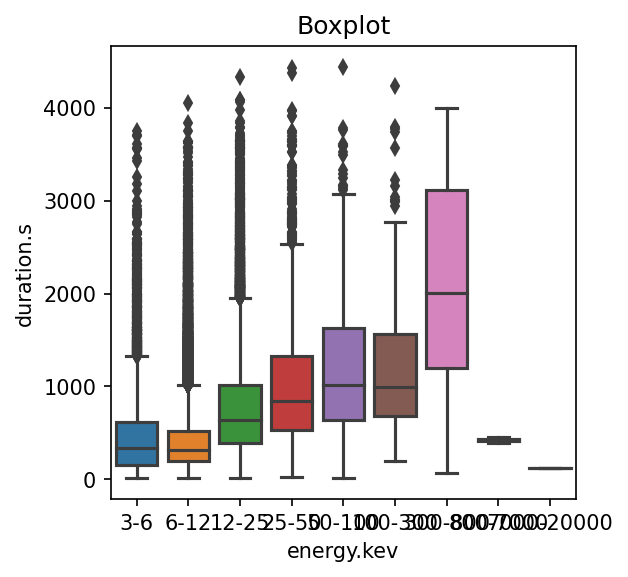

In [309]:
plt.figure(figsize=(4,4), dpi = 150)
sns.boxplot(data=df.sort_values('Eprom.kev'), x='energy.kev', y="duration.s")
plt.title('Boxplot')
# df.describe()

C:\Users\santi\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='duration.s', ylabel='Density'>

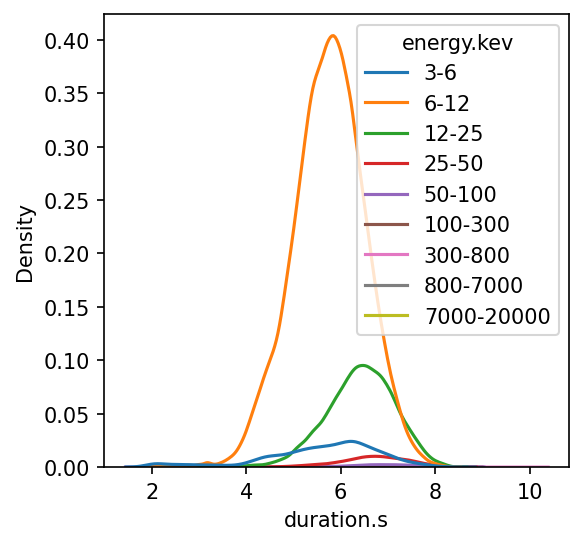

In [55]:
plt.figure(figsize=(4,4), dpi = 150)

df['duration.s'] = np.log(df['duration.s'])
sns.kdeplot(data=df.sort_values('Eprom.kev'), x='duration.s', hue='energy.kev') 
plt-xlabel('log(duration.s)')